In [ ]:
# WeatherPy
----

#### Observable trends based off data
    
    1) There are no cities examined that have humidity > 100%.
    2) The scatter plots indicated that while in the southern hemisphere as you move closer to the 
    equator the temperature increases, conversely in the northern hemisphere as you move away from 
    the equator the temperature decreases.
    3) The regressions do not display much of a correlation between the different data sets.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

587

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

requests.get(query_url + "Denver").json()

{'coord': {'lon': -104.9847, 'lat': 39.7392},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 97.14,
  'feels_like': 92.34,
  'temp_min': 83.71,
  'temp_max': 101.05,
  'pressure': 1010,
  'humidity': 12},
 'visibility': 10000,
 'wind': {'speed': 1.99, 'deg': 116, 'gust': 5.99},
 'clouds': {'all': 0},
 'dt': 1623713335,
 'sys': {'type': 2,
  'id': 2004334,
  'country': 'US',
  'sunrise': 1623670286,
  'sunset': 1623724157},
 'timezone': -21600,
 'id': 5419384,
 'name': 'Denver',
 'cod': 200}

In [4]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

weather_list = []
set_counter = 0

# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    temp = {}
    try:
        response = requests.get(query_url + city).json()
        temp["city"] = response["name"]
        temp["cloudiness"] = response["clouds"]["all"]
        temp["country"] = response["sys"]["country"]
        temp["date_list"] = response["dt"]
        temp["humidity"] = response["main"]["humidity"]
        temp["Lat_List"] = response["coord"]["lat"]
        temp["Lng_List"] = response["coord"]["lon"]
        temp["Max_Temp_List"] = response["main"]["temp_max"]
        temp["Wind_Speed_List"] = response["wind"]["speed"]
        weather_list.append(temp)
        
        if index > 49:
            index = 0
            set_counter = set_counter + 1
    
        else:
            index = index + 1
            
        print(f"Processing Record {index} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 2 of Set 0 : nagahama
Processing Record 3 of Set 0 : port macquarie
Processing Record 4 of Set 0 : bubaque
Processing Record 5 of Set 0 : saint-philippe
Processing Record 6 of Set 0 : khatanga
Processing Record 7 of Set 0 : pristen
Processing Record 8 of Set 0 : georgetown
Processing Record 9 of Set 0 : rikitea
City not found. Skipping...
Processing Record 11 of Set 0 : cape town
Processing Record 12 of Set 0 : eyl
City not found. Skipping...
Processing Record 14 of Set 0 : nikolskoye
Processing Record 15 of Set 0 : torbay
Processing Record 16 of Set 0 : lompoc
Processing Record 17 of Set 0 : ulladulla
Processing Record 18 of Set 0 : kapaa
Processing Record 19 of Set 0 : mitzic
Processing Record 20 of Set 0 : gobabis
Processing Record 21 of Set 0 : boulder city
Processing Record 22 of Set 0 : ust-kuyga
Processing Record 23 of Set 0 : tasiilaq
Processing Record 24 of Set 0 : umba
Processing Record 25 of Set 0 : bu

Processing Record 0 of Set 142 : chokurdakh
City not found. Skipping...
Processing Record 0 of Set 143 : erzin
Processing Record 0 of Set 144 : muswellbrook
Processing Record 0 of Set 145 : poum
Processing Record 0 of Set 146 : sonoita
Processing Record 0 of Set 147 : nouakchott
Processing Record 0 of Set 148 : sehithwa
Processing Record 0 of Set 149 : kupang
Processing Record 0 of Set 150 : takoradi
Processing Record 0 of Set 151 : cordoba
Processing Record 0 of Set 152 : ilo
Processing Record 0 of Set 153 : thurso
Processing Record 0 of Set 154 : rocha
Processing Record 0 of Set 155 : acapulco
Processing Record 0 of Set 156 : trinidad
Processing Record 0 of Set 157 : cayenne
Processing Record 0 of Set 158 : bilma
Processing Record 0 of Set 159 : kahului
Processing Record 0 of Set 160 : lorengau
Processing Record 0 of Set 161 : marzuq
Processing Record 0 of Set 162 : guerrero negro
City not found. Skipping...
Processing Record 0 of Set 163 : berlevag
Processing Record 0 of Set 164 : d

Processing Record 0 of Set 325 : haines junction
Processing Record 0 of Set 326 : kurumkan
Processing Record 0 of Set 327 : beloha
Processing Record 0 of Set 328 : ribeira grande
Processing Record 0 of Set 329 : sibolga
Processing Record 0 of Set 330 : richards bay
Processing Record 0 of Set 331 : yulara
Processing Record 0 of Set 332 : riyadh
Processing Record 0 of Set 333 : vila
City not found. Skipping...
Processing Record 0 of Set 334 : sao filipe
Processing Record 0 of Set 335 : yerbogachen
Processing Record 0 of Set 336 : wenchi
Processing Record 0 of Set 337 : miles city
Processing Record 0 of Set 338 : tashtyp
Processing Record 0 of Set 339 : korla
Processing Record 0 of Set 340 : prince rupert
Processing Record 0 of Set 341 : nhulunbuy
Processing Record 0 of Set 342 : santa rosalia
City not found. Skipping...
Processing Record 0 of Set 343 : vagur
Processing Record 0 of Set 344 : ardakan
Processing Record 0 of Set 345 : totskoye
City not found. Skipping...
Processing Record 0 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_df = pd.DataFrame(weather_list)

city_df.head()

,city,cloudiness,country,date_list,humidity,Lat_List,Lng_List,Max_Temp_List,Wind_Speed_List
0,Nagahama,48,JP,1623713964,98,35.3833,136.2667,77.99,2.37
1,Port Macquarie,95,AU,1623713840,61,-31.4333,152.9167,56.89,2.04
2,Bubaque,98,GW,1623713965,80,11.2833,-15.8333,81.00,10.38
3,Saint-Philippe,57,RE,1623713965,75,-21.3585,55.7679,71.22,11.07
4,Khatanga,86,RU,1623713966,76,71.9667,102.5000,48.67,6.96


In [6]:
city_df.to_csv(output_data_file, index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
city_df.loc[city_df["humidity"] > 100]

,city,cloudiness,country,date_list,humidity,Lat_List,Lng_List,Max_Temp_List,Wind_Speed_List


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

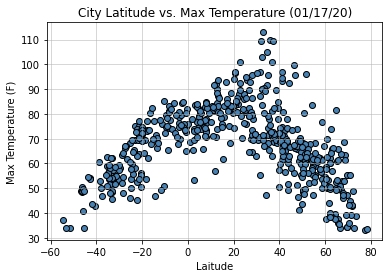

In [9]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(city_df["Lat_List"], city_df["Max_Temp_List"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Max Temperature (01/17/20)")
plt.xlabel("Laitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

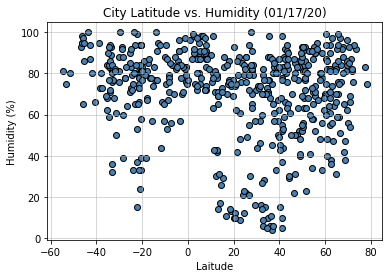

In [10]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(city_df["Lat_List"], city_df["humidity"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Humidity (01/17/20)")
plt.xlabel("Laitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("../Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

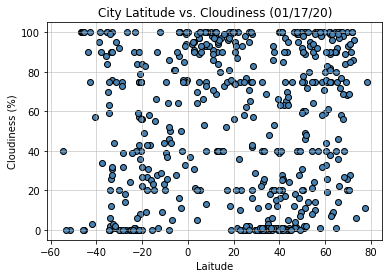

In [12]:
# Latitude vs Cloudiness 
plt.scatter(city_df["Lat_List"], city_df["cloudiness"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Cloudiness (01/17/20)")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("../Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

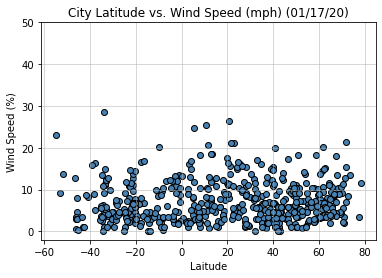

In [13]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(city_df["Lat_List"], city_df["Wind_Speed_List"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (01/17/20)")
plt.xlabel("Laitude")
plt.ylabel("Wind Speed (%)")
plt.ylim(-2,50)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("../Images/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [17]:
northern_hemisphere = city_df.loc[(city_df["Lat_List"]).astype(float) > 0, :]
southern_hemisphere = city_df.loc[(city_df["Lat_List"]).astype(float) < 0, :]

In [18]:
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

The r-squared is : -0.67


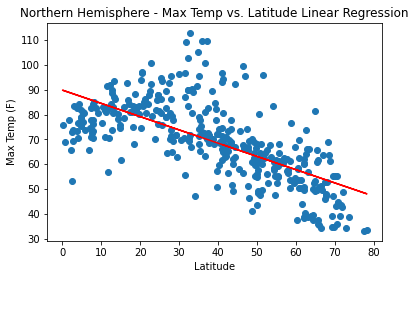

In [19]:
# NH - Max Temp vs latitude Linear Regression
equation = linear_agression(northern_hemisphere["Lat_List"], northern_hemisphere["Max_Temp_List"])
annotate(equation, 0, 0)
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.8


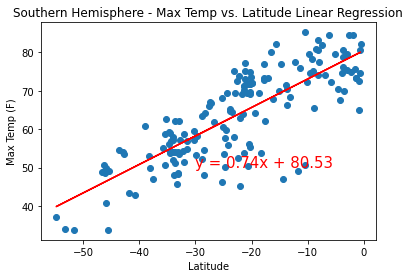

In [21]:
# SH - Max Temp vs Latitude Linear Regression
equation = linear_agression(southern_hemisphere["Lat_List"],southern_hemisphere["Max_Temp_List"])
annotate(equation, -30, 50)
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.02


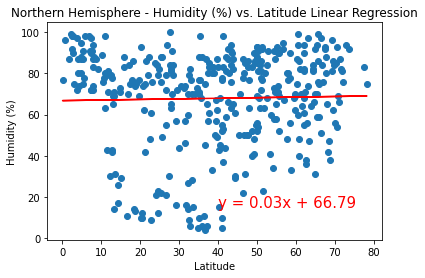

In [22]:
# NH - Humidity % vs Latitude linear Regression
equation = linear_agression(northern_hemisphere["Lat_List"], northern_hemisphere["humidity"])
annotate(equation, 40, 15)
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.06


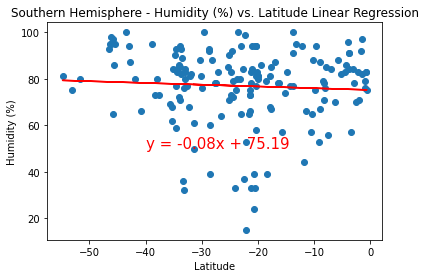

In [23]:
# SH - Humidity % vs latitude Linear Regression
equation = linear_agression(southern_hemisphere["Lat_List"], southern_hemisphere["humidity"])
annotate(equation, -40, 50)
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.04


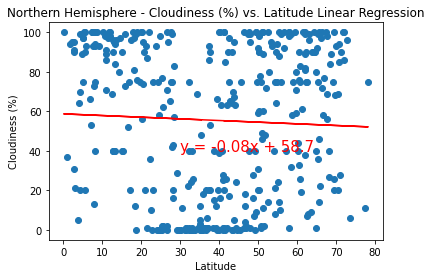

In [24]:
# NH - Cloudiness % vs Latitude Linear Regression
equation = linear_agression(northern_hemisphere["Lat_List"], northern_hemisphere["cloudiness"])
annotate(equation, 30, 40)
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.04


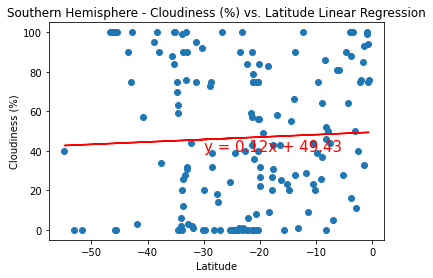

In [25]:
# SH - Cloudiness % vs Latitude Linear Regression
equation = linear_agression(southern_hemisphere["Lat_List"], southern_hemisphere["cloudiness"])
annotate(equation, -30, 40)
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.05


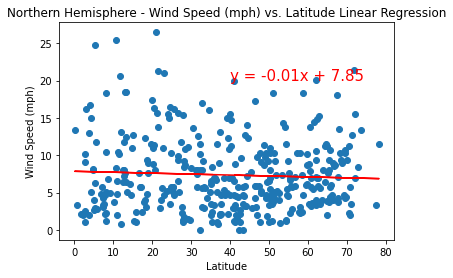

In [26]:
# NH - Wind Speed vs. Latitude Linear Regression
equation = linear_agression(northern_hemisphere["Lat_List"], northern_hemisphere["Wind_Speed_List"])
annotate(equation, 40, 20)
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.07


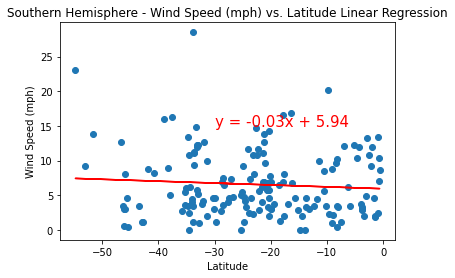

In [27]:
# SH - Wind Speed vs. Latitude Linear Regression
equation = linear_agression(southern_hemisphere["Lat_List"], southern_hemisphere["Wind_Speed_List"])
annotate(equation, -30, 15)
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")